## Time Serier Forecasting Using FbProphet 

### Installation instructions

```bash
pip install pystan
conda install -c conda-forge fbprophet
```

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

%matplotlib inline
%config Completer.use_jedi = False

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("./datasets/airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


## Data Cleaning

In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df[df["Thousands of Passengers"].isnull()]

,Month,Thousands of Passengers
144,International airline passengers: monthly tota...,NaN


In [5]:
df.drop(144,inplace=True)
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [13]:
print("Start Date: ", df["Month"].iloc[0], "\nEnd Date: ", df["Month"].iloc[-1])
print("Airline Passenger Data is from ",df["Month"].iloc[0].split('-')[0],"to",df["Month"].iloc[-1].split('-')[0])

Start Date:  1949-01 
End Date:  1960-12
Airline Passenger Data is from  1949 to 1960


<AxesSubplot:title={'center':'Plot of increase of passenger with time'}, xlabel='Time in Months', ylabel='Number of Passenger (Thousand)'>

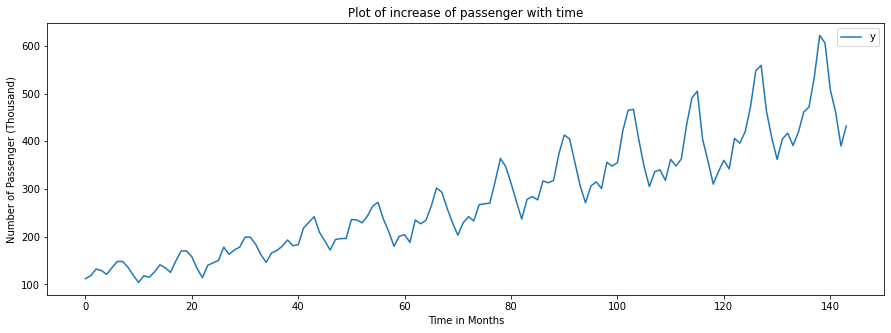

In [18]:
df.columns = ['ds','y'] # Renaming columns for Prophet model, y=> output
df.plot(title="Plot of increase of passenger with time", xlabel="Time in Months", ylabel="Number of Passenger (Thousand)",
        figsize = (15,5))

In [18]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


## Prophet Model

In [19]:
model = Prophet()
model.fit(df)
model.component_modes

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [21]:
## Creating future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


## Prediction

In [22]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,55.643405,112.170753,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,49.008058,107.208157,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,81.422050,139.138908,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,78.614222,137.754306,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,81.909409,140.479269,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


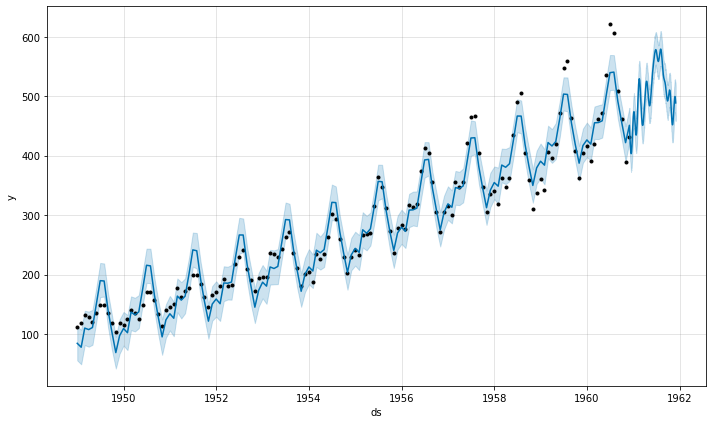

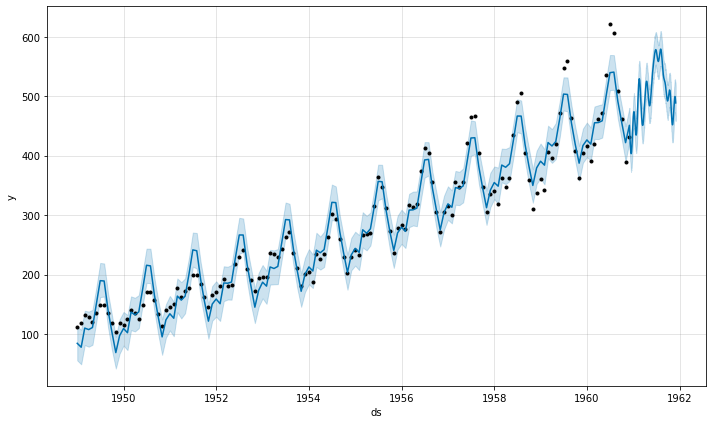

In [23]:
model.plot(prediction)

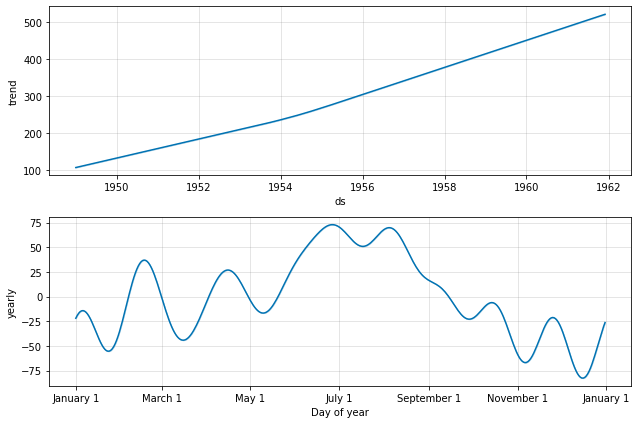

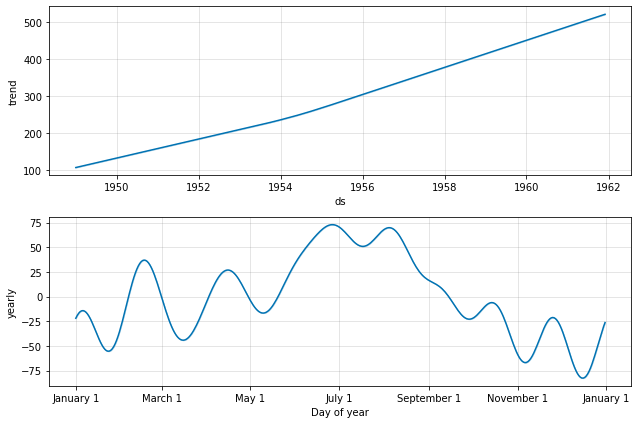

In [24]:
## Visualizing Each Components[Trends,yearly]
model.plot_components(prediction)

### Cross Validation

* We have data from 60 to 62, so we split it into train and test
* 1960-61 => Train dataset
* 1961-62 => Test dataset
* 1962-63 => Validation ( the new future dates we created )

In [26]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [27]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.616854,157.008670,150.0,1951-01-18
1,1951-03-01,169.267028,168.561038,169.953333,178.0,1951-01-18
2,1951-04-01,156.601332,155.044162,158.010554,163.0,1951-01-18
3,1951-05-01,142.228261,139.910678,144.406791,172.0,1951-01-18
4,1951-06-01,177.404761,174.079729,180.734740,178.0,1951-01-18


In [28]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.227273
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.181818
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.136364
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.136364
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.181818


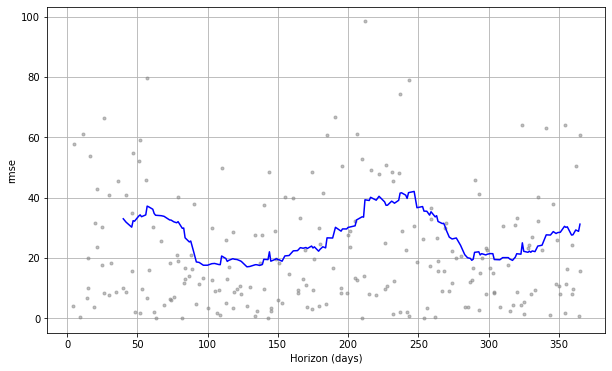

In [29]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')